# **Implementación Cascadas de Haar**

## Características de Haar
#### El algoritmo de Cascadas de Haar usa filtros restangulares que detectan contrastes de intensidad (claros/oscuros) en la imagen, características típicas de un rostro.
#### * Borde horizontal (Separación frente-cejas)
#### * Borde vertical (Nariz-mejillas)
#### * Rectángulos centrados (Ojos, región oscura sobre fondo claro)
#### * Linea horizontal (Boca)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [47]:
"""
Funciones auxiliares
"""
#Funcion para binarizar una imagen
def binariza(imagen, umbral):
    alto, ancho = imagen.shape
    for y in range(alto):
        for x in range(ancho):
            pixel = imagen[y, x]# Acceder al píxel en posición (x,y)
            if(pixel > umbral):
                imagen[y,x] = 255
            else:
                imagen[y,x] = 0
    return imagen


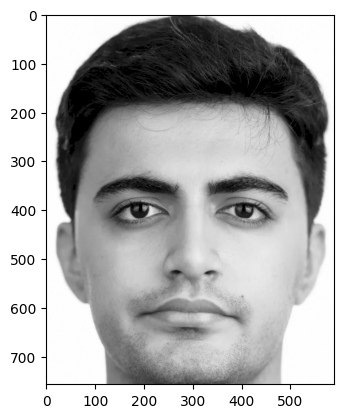

In [2]:
cara1 = cv.imread("cara1.png", cv.IMREAD_GRAYSCALE)

plt.imshow(cara1, cmap='gray', vmin=0, vmax=255)
plt.show()

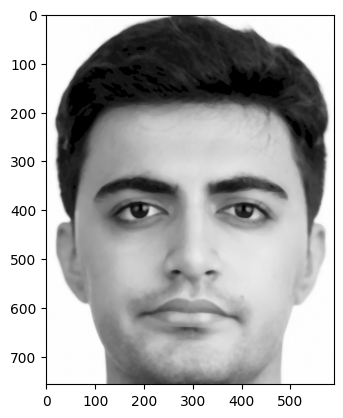

In [16]:
cara_fil = cv.medianBlur(cara1, ksize=7)


plt.imshow(cara_fil, cmap='gray', vmin=0, vmax=255)
plt.show()

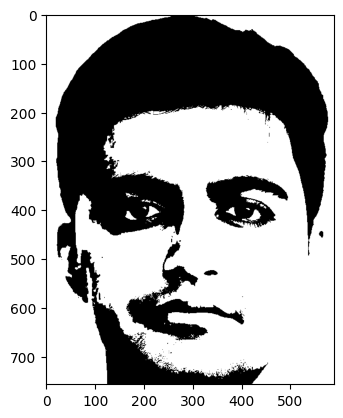

In [50]:
cara_b = binariza(cara1, 150)

plt.imshow(cara_b, cmap='gray', vmin=0, vmax=255)
plt.show()